# MWM Simulation Targets Overview
This notebook gives a general summary of each targeting class

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
import astropy.units as u
%matplotlib inline

In [2]:
#Define helper Functions
def num_quanta(target_tab,cadence_tab,exptime=15,rotatelabels=False):
    '''
    Prints total number of quanta per cadence
    
    Arguments:
        target_tab: target Table
        cadence_tab: Cadence Table
    Keywords:
        exptime: The length of each quanta in minutes
        rotatelabels: Whether to rotate pie chart labels
    Returns:
        ntotal: Number of targets for all cadences
        qtotal: Number of quanta for all cadences
        
    '''   
    num_list = list()
    cadence_list = list()
    quanta_list = list()
    for cadence in cadence_tab['cadence']:
        nepoch = cadence_tab['nepochs'][(cadence_tab['cadence'] == cadence)][0] 
        num = len(target_tab[(target_tab['cadence'] == cadence)])
        quanta = num*nepoch
        num_list.append(num)
        quanta_list.append(quanta)
        cadence_list.append(cadence)

    num_arr = np.array(num_list)
    quanta_arr = np.array(quanta_list)
    ntotal = np.sum(num_arr)
    qtotal = np.sum(quanta_arr)
    
    print("Total Target Number: {}".format(ntotal))
    print("Target-weighted Average Number of Epochs: {:.2f}".format(qtotal/ntotal))
    print("Total Quanta: {}".format(qtotal))
    print("Total Fiber-Hours: {}".format(qtotal*exptime/60.0))
    print()
    
    for i in range(len(num_arr)):
        print("{} : {} Targets, {} quanta, {} Fiber-hours, {:.1%} Percent total ".format(
                                                            cadence_list[i],num_arr[i], quanta_arr[i],
                                                            quanta_arr[i]*exptime/60.0, quanta_arr[i]/qtotal))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.pie(num_arr,labels=cadence_list,rotatelabels=rotatelabels)
    plt.title("Targets per Cadence")
    plt.subplot(1,2,2)
    plt.pie(quanta_arr,labels=cadence_list,rotatelabels=rotatelabels)
    plt.title("Quanta per Cadence")
    plt.show()
    return(ntotal,qtotal)
        
def num_quanta_lst(target_tab,cadence_tab):
    '''
    Create histogram of quanta per cadence per lst
    
    Arguments:
        target_tab: target Table
        cadence_tab: Cadence Table
    Returns:
        combo_ra_list: A list of RAs for all Cadences
        combo_nepoch_list: Average nepochs for all Cadences
    '''
    ra_list = list()
    combo_ra_list = list()
    nepoch_list = list()
    combo_nepoch_list = list()
    label_list = list()
    for cadence in cadence_tab['cadence']:
        ra_list.append(target_tab['ra'][(target_tab['cadence'] == cadence)]/15)
        combo_ra_list.extend(target_tab['ra'][(target_tab['cadence'] == cadence)]/15)
        nepoch_list.append(np.repeat(cadence_tab['nepochs'][(cadence_tab['cadence'] == cadence)][0],
                                     len(target_tab['ra'][(target_tab['cadence'] == cadence)])))
        combo_nepoch_list.extend(np.repeat(cadence_tab['nepochs'][(cadence_tab['cadence'] == cadence)][0],
                                     len(target_tab['ra'][(target_tab['cadence'] == cadence)])))
        label_list.append(cadence)
    plt.figure(figsize=(10,5))
    plt.hist(ra_list,bins=24,range=(0,24),weights=nepoch_list,label=label_list,histtype='barstacked',
            edgecolor='black')
    plt.xlabel("LST")
    plt.ylabel("Number of Quanta")
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    return(combo_ra_list,combo_nepoch_list)

def plot_targets(target_tab,cadence_tab,alpha=.1):
    '''
    Plots targets in Equatorial, Galactic, and Eclipitic coordinates
    
    Arguments:
        target_tab: target Table
        cadence_tab: Cadence Table
    Keywords:
        alpha: The alpha value to use with plotting
    Returns:
        Nothing (Prints values)
    '''
    (fig,bmap) = testfield_gal()

    for cadence in cadence_tab['cadence']:
        ra = target_tab['ra'][(target_tab['cadence'] == cadence)]
        dec = target_tab['dec'][(target_tab['cadence'] == cadence)]
    
        coord_fk5 = SkyCoord(ra,dec,unit=(u.deg,u.deg),frame="fk5")
        coord_gal = coord_fk5.transform_to(Galactic())
    
        x,y = bmap(coord_gal.l,coord_gal.b)
        bmap.scatter(x,y,marker='.',label=cadence,alpha=alpha)

    plt.title("Galactic Coordinates")
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [3]:
ver = 'beta-0'
plt.rcParams.update({'font.size': 14})
uber_cadence_list = list()
uber_ntotal_list = list()
uber_qtotal_list = list()
uber_ra_list = list()
uber_nepoch_list = list()

## Galactic Genesis

Total Target Number: 5000000
Target-weighted Average Number of Epochs: 1.00
Total Quanta: 5000000
Total Fiber-Hours: 1250000.0

mwm_galactic_1x1 : 5000000 Targets, 5000000 quanta, 1250000.0 Fiber-hours, 100.0% Percent total 


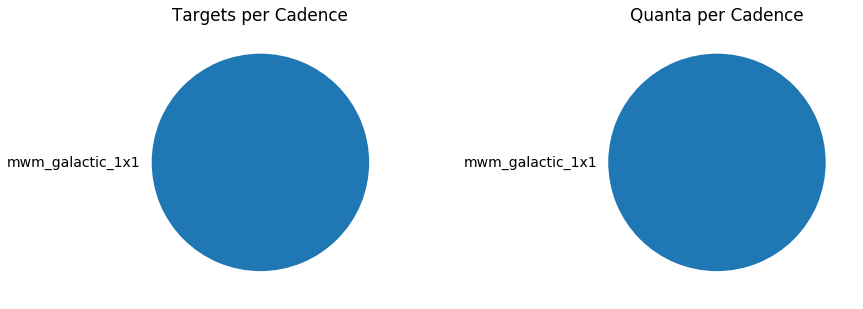

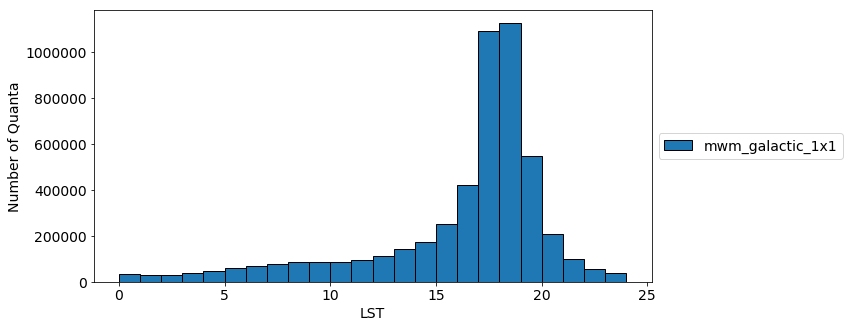

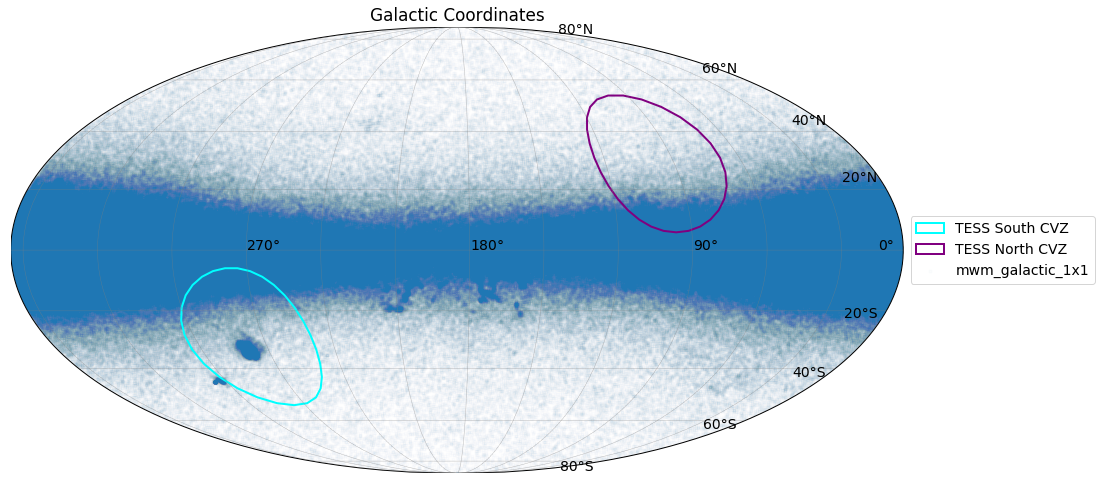

In [4]:
target_tab = Table.read('{}/mwm_galactic_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_galactic_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_galactic')

plot_targets(target_tab,cadence_tab,alpha=0.01)

## RV Targets

Total Target Number: 129759
Target-weighted Average Number of Epochs: 17.56
Total Quanta: 2278254
Total Fiber-Hours: 569563.5

mwm_rv_3x1 : 54087 Targets, 162261 quanta, 40565.25 Fiber-hours, 7.1% Percent total 
mwm_rv_3x2 : 0 Targets, 0 quanta, 0.0 Fiber-hours, 0.0% Percent total 
mwm_rv_3x4 : 0 Targets, 0 quanta, 0.0 Fiber-hours, 0.0% Percent total 
mwm_rv_6x1 : 7122 Targets, 42732 quanta, 10683.0 Fiber-hours, 1.9% Percent total 
mwm_rv_6x2 : 3215 Targets, 38580 quanta, 9645.0 Fiber-hours, 1.7% Percent total 
mwm_rv_6x4 : 5535 Targets, 132840 quanta, 33210.0 Fiber-hours, 5.8% Percent total 
mwm_rv_9x1 : 3911 Targets, 35199 quanta, 8799.75 Fiber-hours, 1.5% Percent total 
mwm_rv_9x2 : 1893 Targets, 34074 quanta, 8518.5 Fiber-hours, 1.5% Percent total 
mwm_rv_9x4 : 3329 Targets, 119844 quanta, 29961.0 Fiber-hours, 5.3% Percent total 
mwm_rv_12x1 : 7771 Targets, 93252 quanta, 23313.0 Fiber-hours, 4.1% Percent total 
mwm_rv_12x2 : 3567 Targets, 85608 quanta, 21402.0 Fiber-hours, 3.8% Per

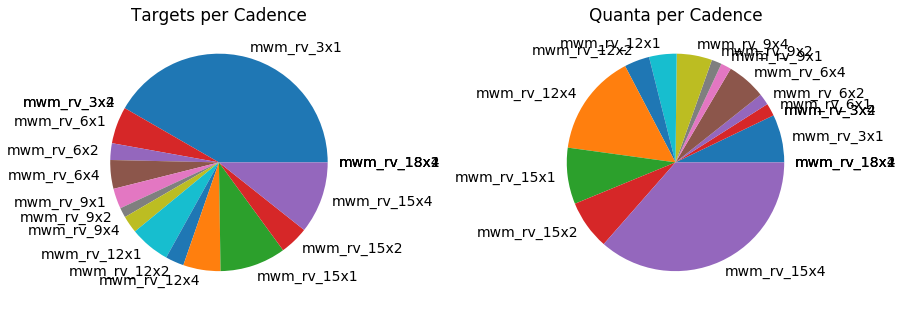

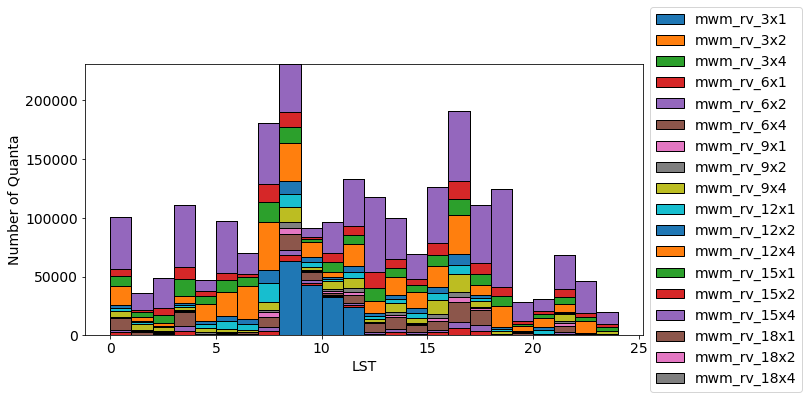

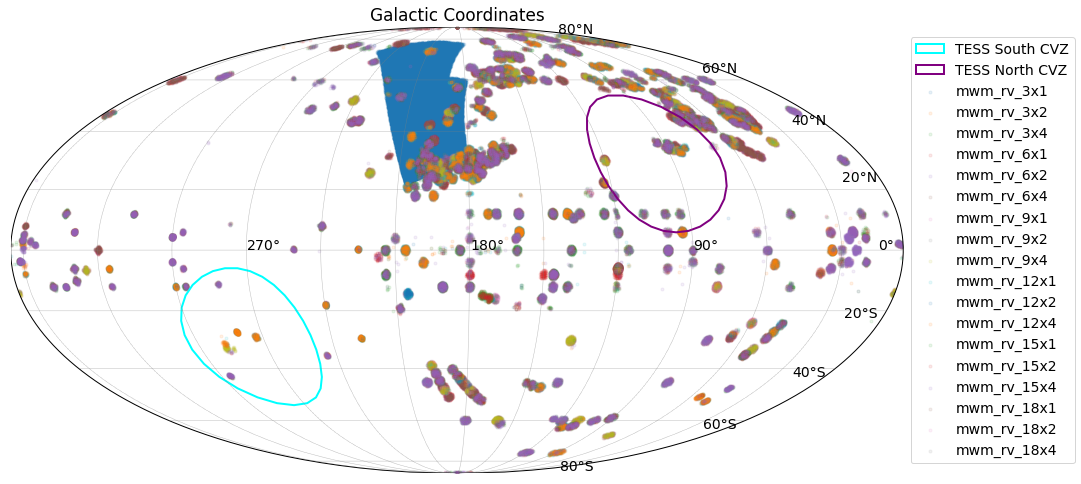

In [5]:
target_tab = Table.read('{}/mwm_rv_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_rv_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_rv')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## Survey of Everything Targets

Total Target Number: 322221
Target-weighted Average Number of Epochs: 1.33
Total Quanta: 429777
Total Fiber-Hours: 107444.25

mwm_100pc_faint_1x1 : 214665 Targets, 214665 quanta, 53666.25 Fiber-hours, 49.9% Percent total 
mwm_100pc_bright_2x1 : 107556 Targets, 215112 quanta, 53778.0 Fiber-hours, 50.1% Percent total 


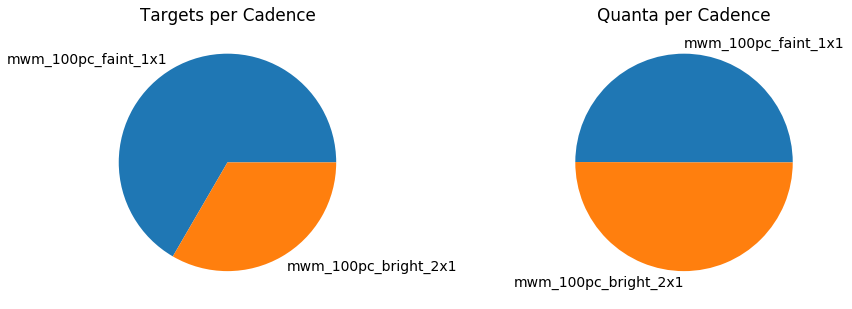

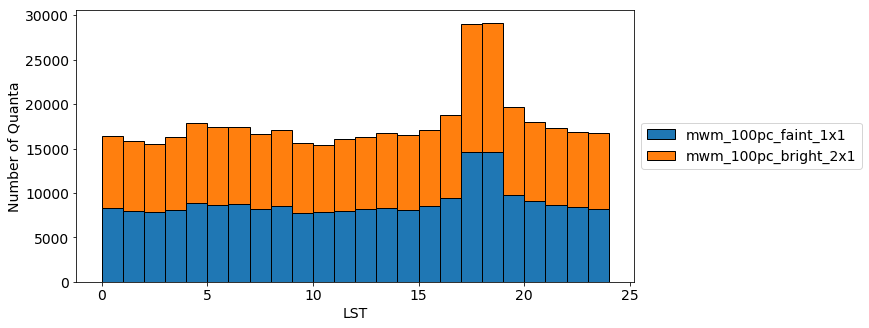

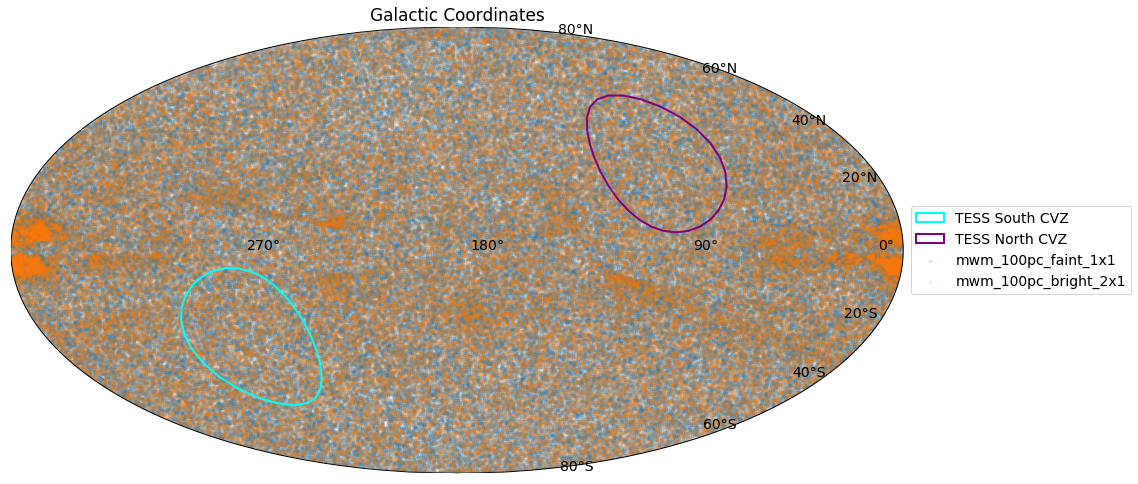

In [6]:
target_tab = Table.read('{}/mwm_100pc_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_100pc_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)

#Build Uber arrays and lists
uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_100pc')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## White Dwarf Binaries

Total Target Number: 199371
Target-weighted Average Number of Epochs: 2.00
Total Quanta: 398742
Total Fiber-Hours: 99685.5

mwm_wd_2x1 : 199371 Targets, 398742 quanta, 99685.5 Fiber-hours, 100.0% Percent total 


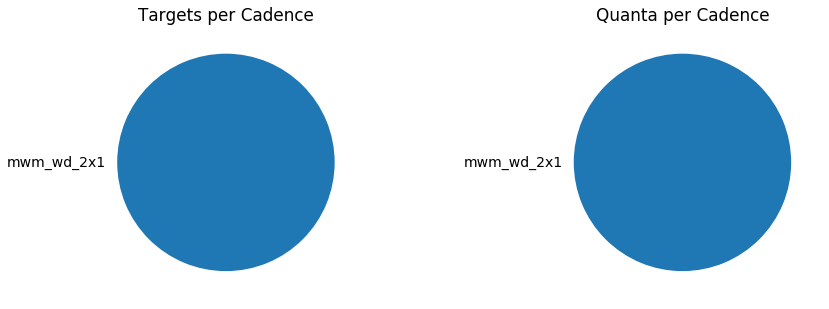

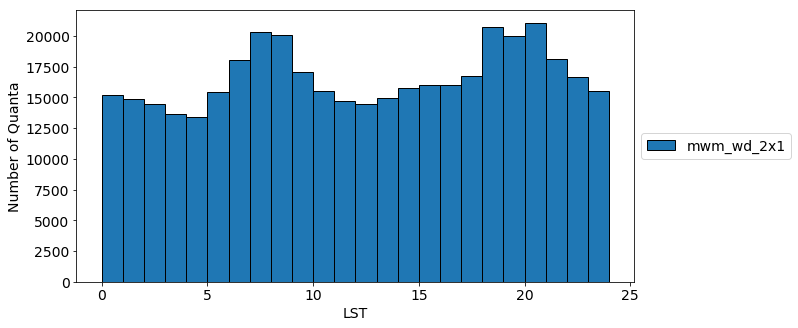

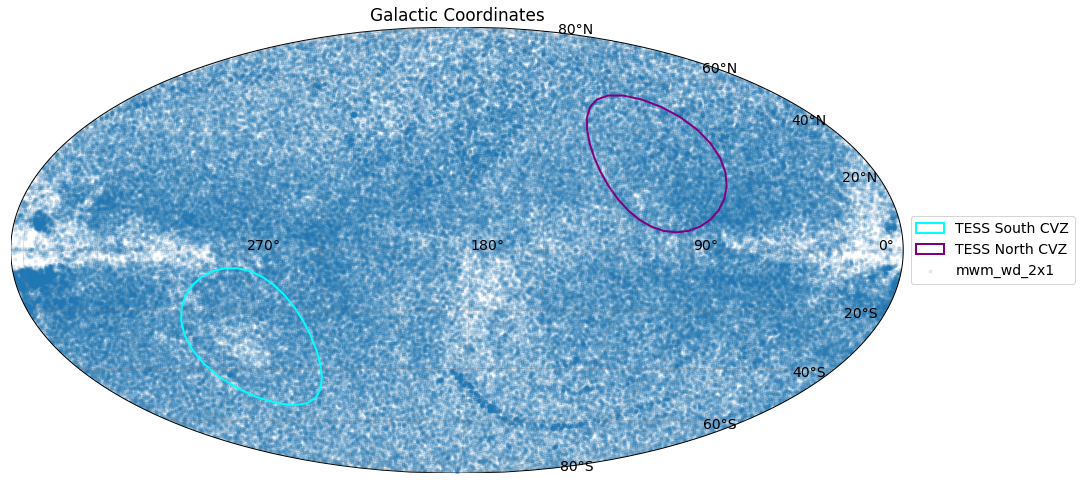

In [7]:
target_tab = Table.read('{}/mwm_wd_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_wd_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_wd')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## Compact Binaries

Total Target Number: 8534
Target-weighted Average Number of Epochs: 2.00
Total Quanta: 17068
Total Fiber-Hours: 4267.0

mwm_cb_2x1 : 8534 Targets, 17068 quanta, 4267.0 Fiber-hours, 100.0% Percent total 


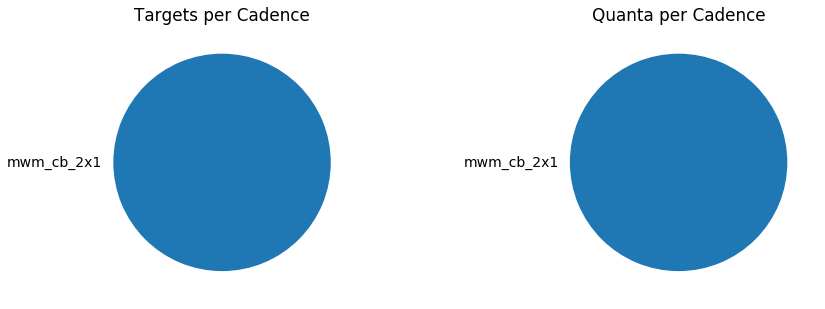

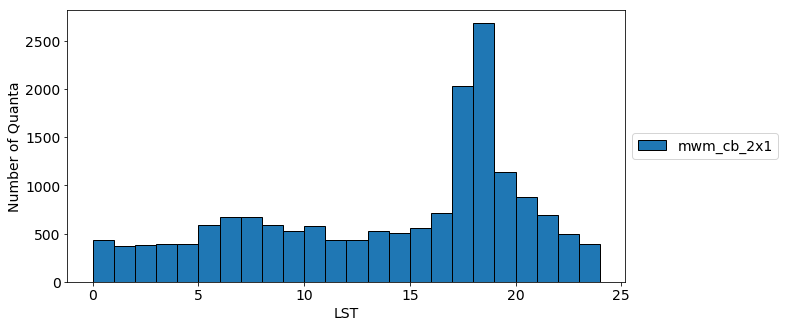

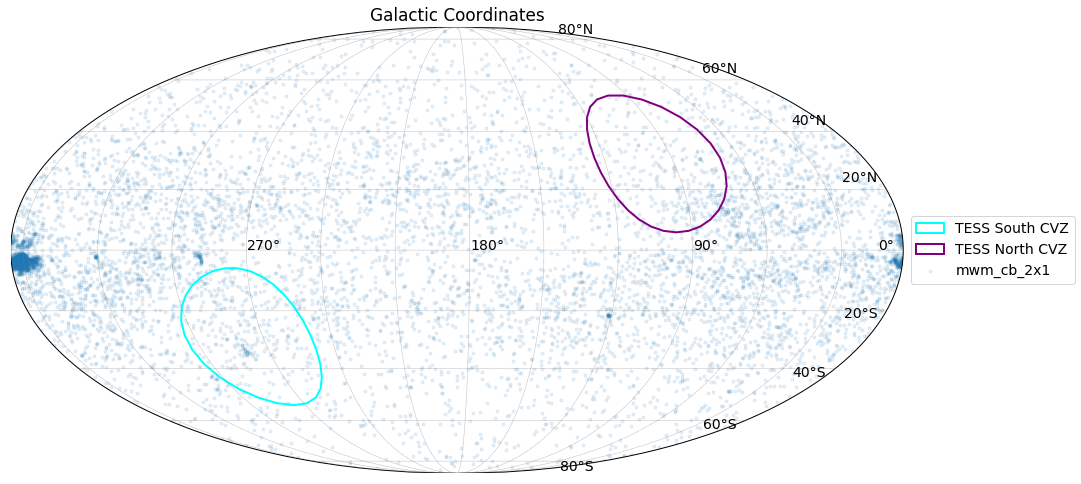

In [8]:
target_tab = Table.read('{}/mwm_cb_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_cb_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_cb')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## Dust

Total Target Number: 152284
Target-weighted Average Number of Epochs: 1.00
Total Quanta: 152284
Total Fiber-Hours: 38071.0

mwm_dust_1x1 : 152284 Targets, 152284 quanta, 38071.0 Fiber-hours, 100.0% Percent total 


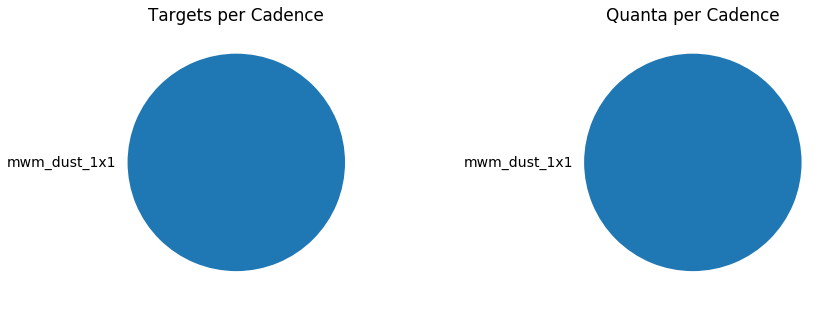

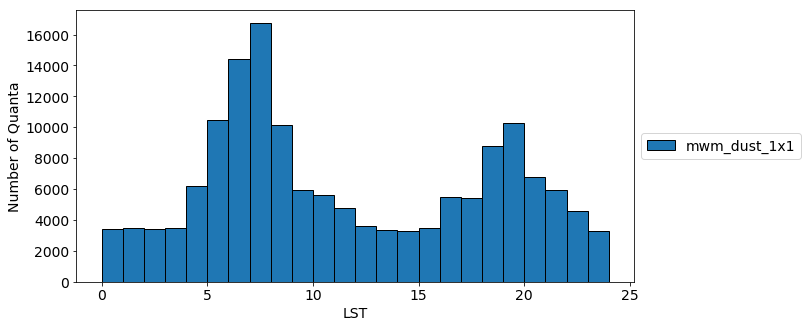

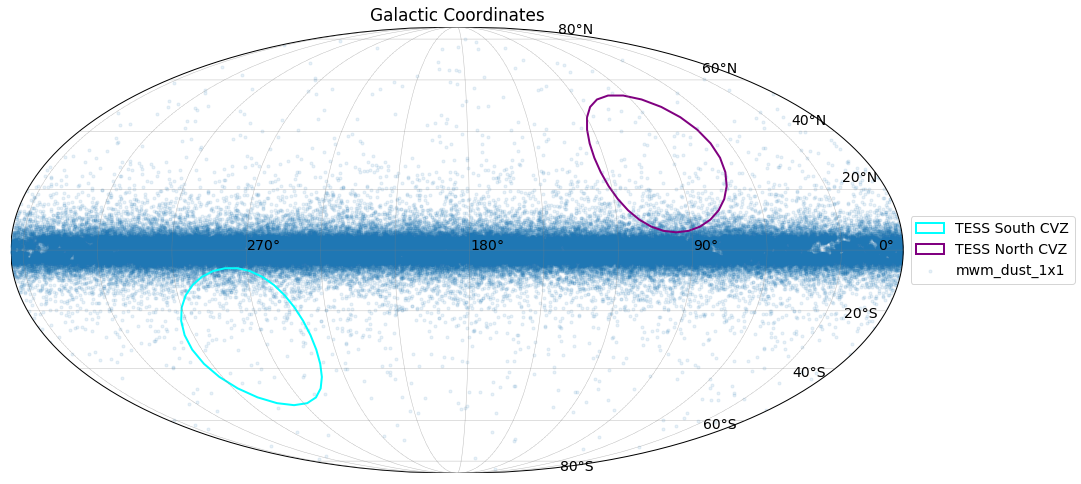

In [9]:
target_tab = Table.read('{}/mwm_dust_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_dust_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_dust')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## eROSITA

Total Target Number: 22561
Target-weighted Average Number of Epochs: 2.62
Total Quanta: 59073
Total Fiber-Hours: 14768.25

mwm_erosita_bright_1x1 : 1829 Targets, 1829 quanta, 457.25 Fiber-hours, 3.1% Percent total 
mwm_erosita_medium_1x2 : 4952 Targets, 9904 quanta, 2476.0 Fiber-hours, 16.8% Percent total 
mwm_erosita_faint_1x3 : 15780 Targets, 47340 quanta, 11835.0 Fiber-hours, 80.1% Percent total 


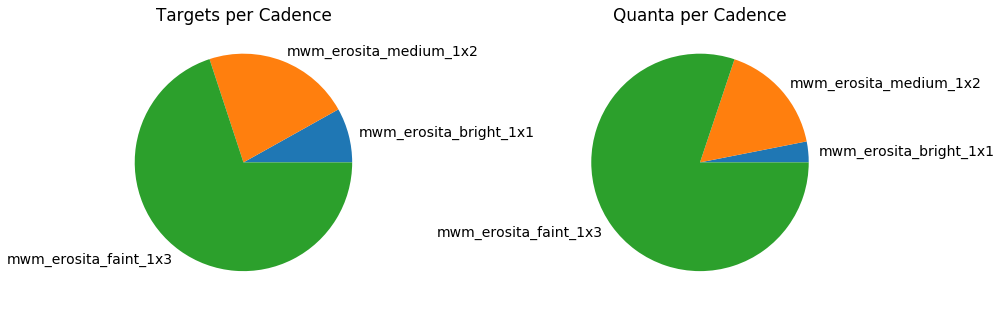

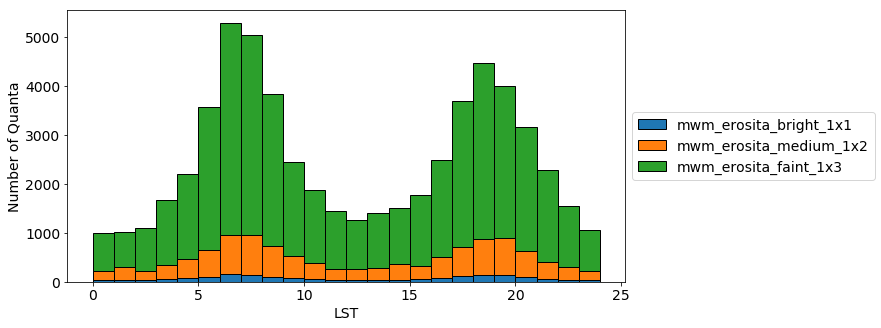

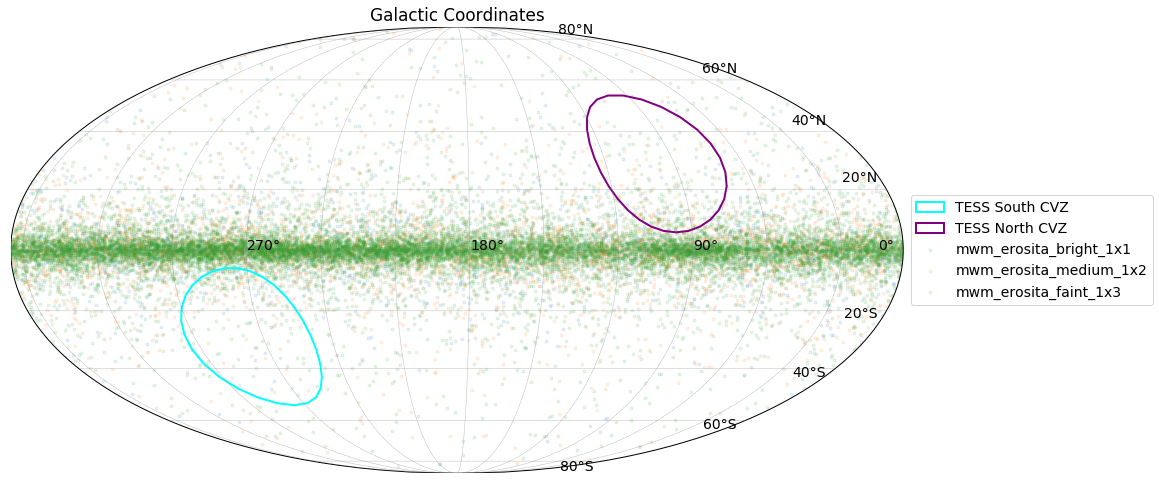

In [10]:
target_tab = Table.read('{}/mwm_eROSITA_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_eROSITA_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_eROSITA')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## TESS Planet Hosts

Total Target Number: 380183
Target-weighted Average Number of Epochs: 1.61
Total Quanta: 612099
Total Fiber-Hours: 153024.75

mwm_planet_1x1 : 256648 Targets, 256648 quanta, 64162.0 Fiber-hours, 41.9% Percent total 
mwm_planet_2x1 : 65245 Targets, 130490 quanta, 32622.5 Fiber-hours, 21.3% Percent total 
mwm_planet_3x1 : 28964 Targets, 86892 quanta, 21723.0 Fiber-hours, 14.2% Percent total 
mwm_planet_4x1 : 14084 Targets, 56336 quanta, 14084.0 Fiber-hours, 9.2% Percent total 
mwm_planet_5x1 : 9719 Targets, 48595 quanta, 12148.75 Fiber-hours, 7.9% Percent total 
mwm_planet_6x1 : 5523 Targets, 33138 quanta, 8284.5 Fiber-hours, 5.4% Percent total 


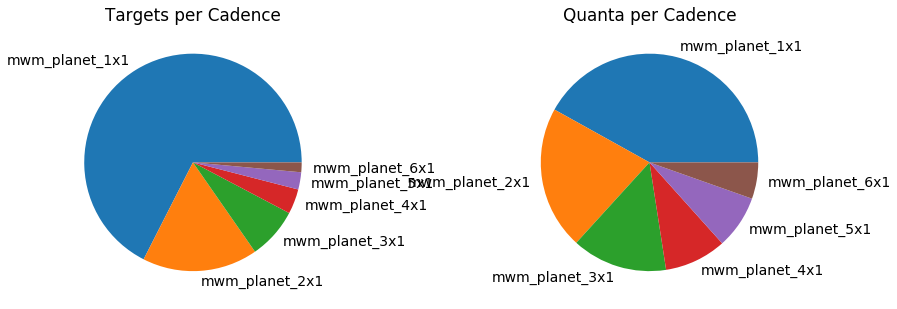

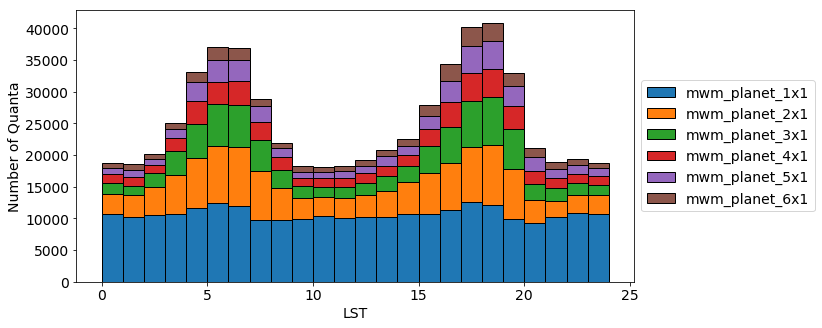

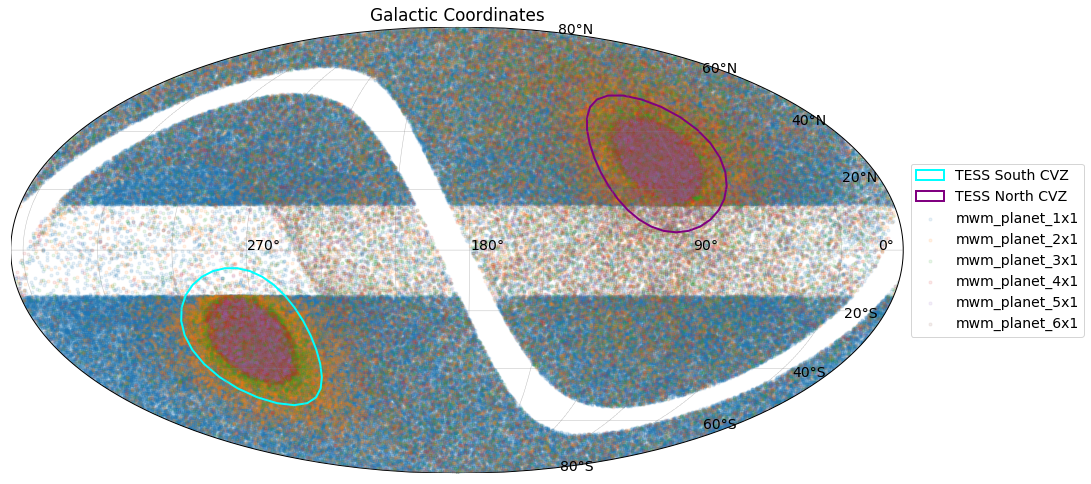

In [11]:
target_tab = Table.read('{}/mwm_planet_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_planet_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_planet')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## TESS OBAF

Total Target Number: 1631
Target-weighted Average Number of Epochs: 12.01
Total Quanta: 19586
Total Fiber-Hours: 4896.5

mwm_tess_obaf_20x1 : 346 Targets, 6920 quanta, 1730.0 Fiber-hours, 35.3% Percent total 
mwm_tess_obaf_20x3 : 121 Targets, 7260 quanta, 1815.0 Fiber-hours, 37.1% Percent total 
mwm_tess_ob_3x1 : 845 Targets, 2535 quanta, 633.75 Fiber-hours, 12.9% Percent total 
mwm_tess_ob_3x3 : 319 Targets, 2871 quanta, 717.75 Fiber-hours, 14.7% Percent total 


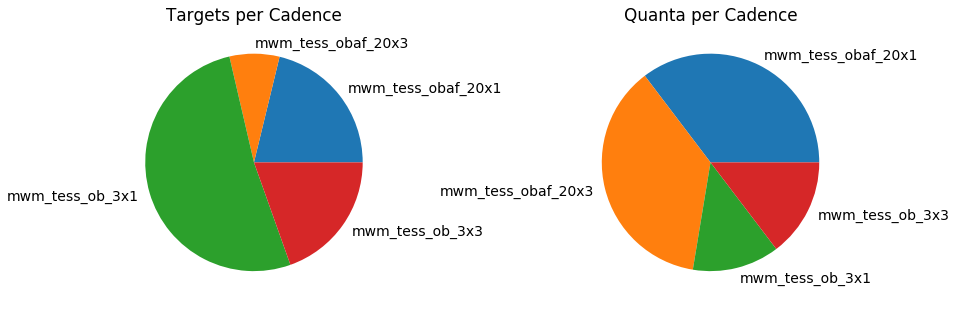

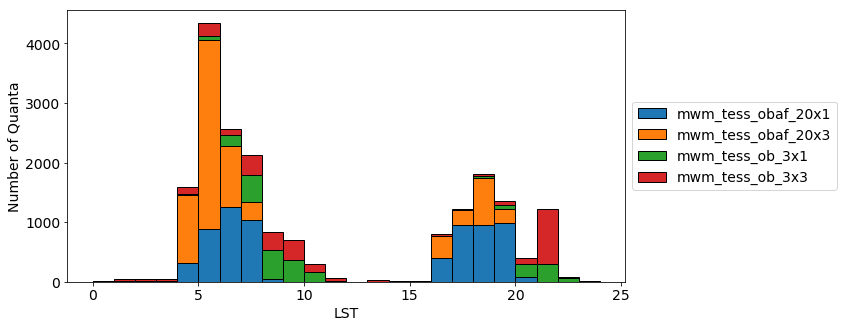

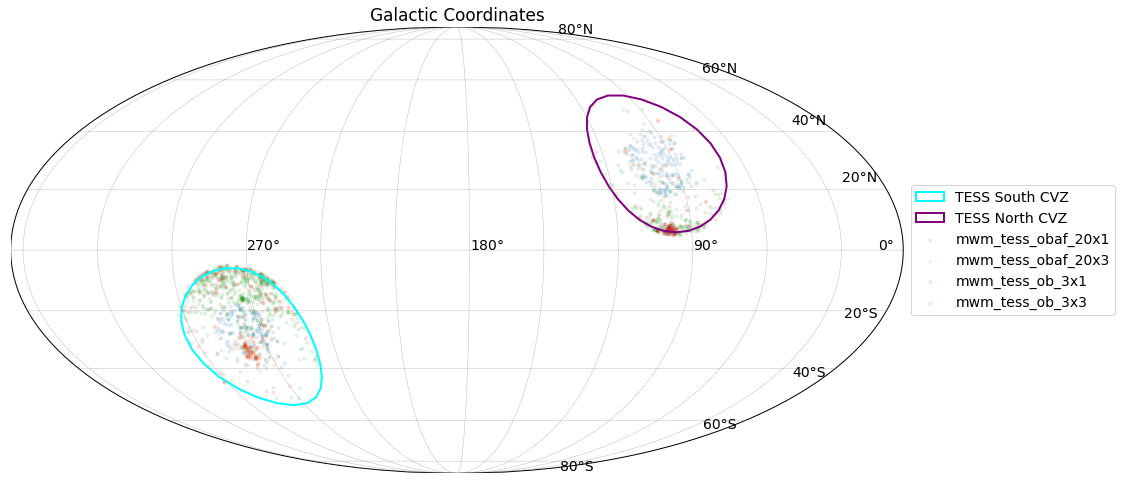

In [12]:
target_tab = Table.read('{}/mwm_tess_obaf_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_tess_obaf_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_tess_obaf')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## TESS RGB

Total Target Number: 250000
Target-weighted Average Number of Epochs: 1.39
Total Quanta: 347098
Total Fiber-Hours: 86774.5

mwm_tess_rgb_1x1 : 169802 Targets, 169802 quanta, 42450.5 Fiber-hours, 48.9% Percent total 
mwm_tess_rgb_2x1 : 63298 Targets, 126596 quanta, 31649.0 Fiber-hours, 36.5% Percent total 
mwm_tess_rgb_3x1 : 16900 Targets, 50700 quanta, 12675.0 Fiber-hours, 14.6% Percent total 


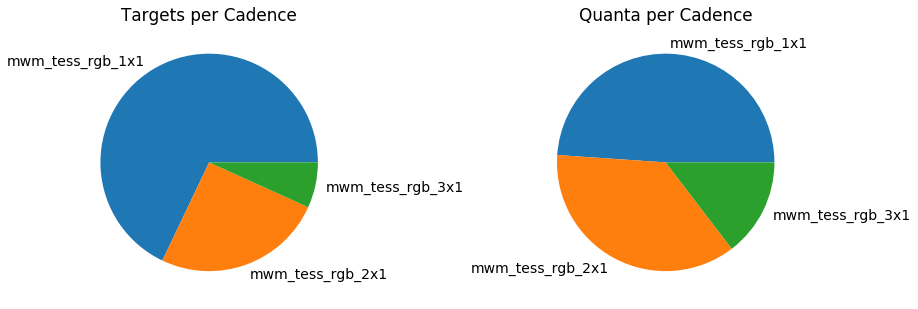

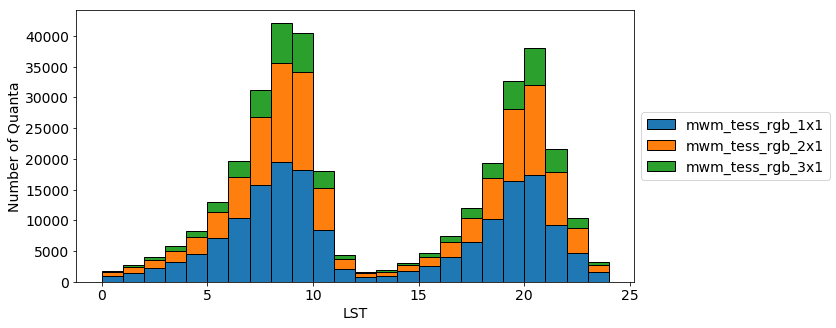

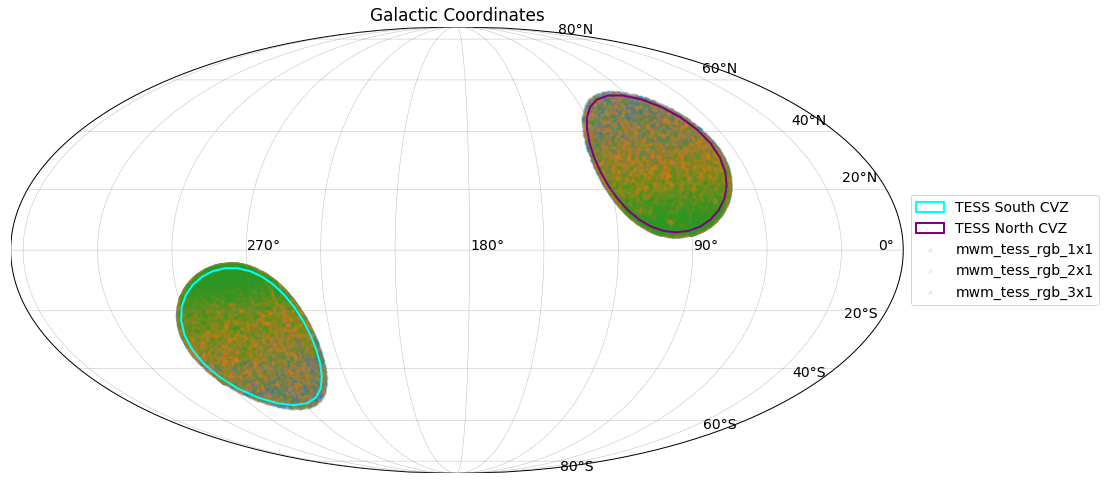

In [13]:
target_tab = Table.read('{}/mwm_tess_rgb_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_tess_rgb_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_tess_rgb')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## YSO

Total Target Number: 95353
Target-weighted Average Number of Epochs: 5.20
Total Quanta: 496005
Total Fiber-Hours: 124001.25

mwm_yso_3x1 : 25371 Targets, 76113 quanta, 19028.25 Fiber-hours, 15.3% Percent total 
mwm_yso_6x1 : 69982 Targets, 419892 quanta, 104973.0 Fiber-hours, 84.7% Percent total 


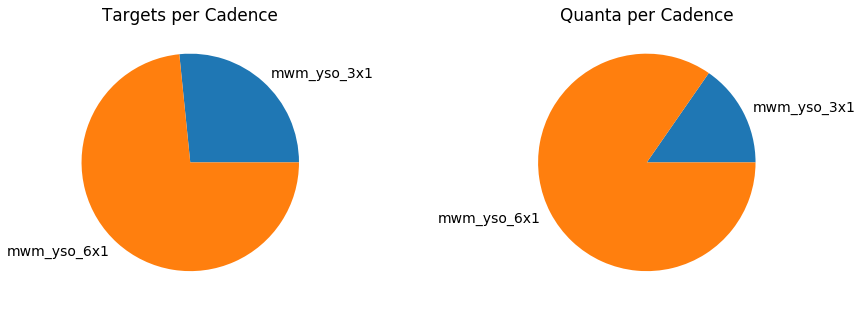

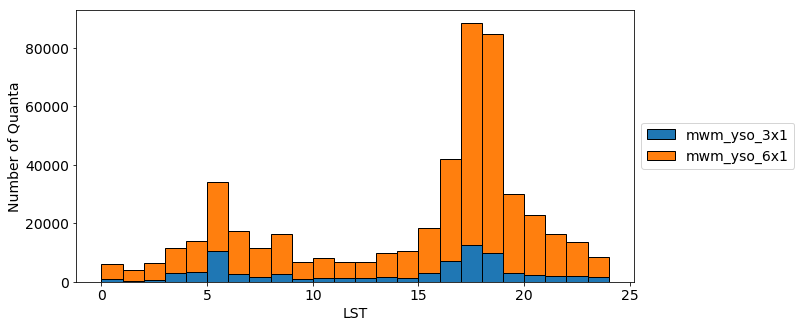

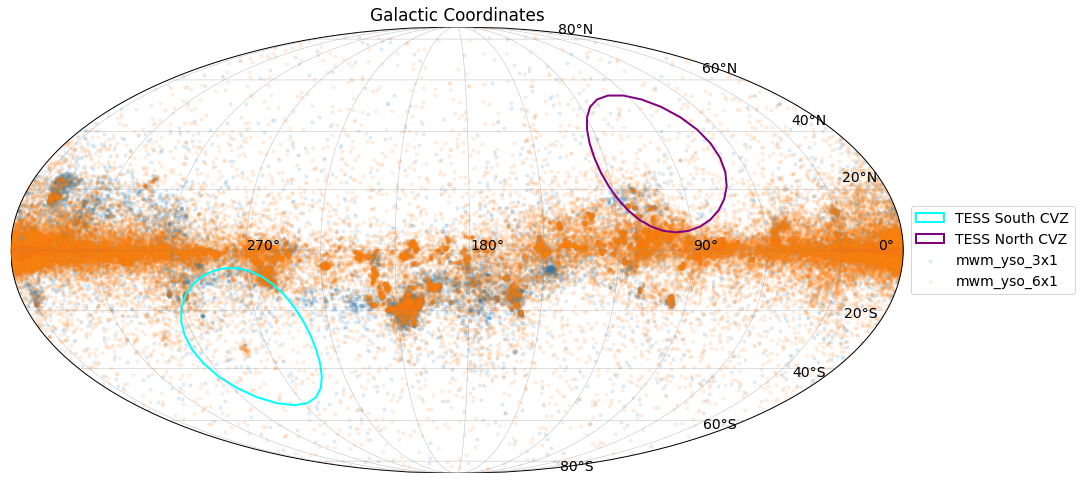

In [14]:
target_tab = Table.read('{}/mwm_yso_target_{}.fits'.format(ver,ver))
cadence_tab = Table.read('{}/mwm_yso_cadence_{}.fits'.format(ver,ver))

(ntotal,qtotal) = num_quanta(target_tab,cadence_tab)

(ra_list,nepoch_list) = num_quanta_lst(target_tab,cadence_tab)
#Build Uber arrays and lists

uber_ra_list.append(ra_list)
uber_nepoch_list.append(nepoch_list)
uber_ntotal_list.append(ntotal)
uber_qtotal_list.append(qtotal)
uber_cadence_list.append('mwm_yso')

plot_targets(target_tab,cadence_tab,alpha=0.1)

## All Targets

Total Target Number for MWM: 6561897
Total Quanta for MWM: 9809986
Total Fiber-Hours for MWM: 2452496.5

mwm_galactic : 5000000 Targets, 5000000 quanta, 1250000.0 Fiber-hours, 51.0% Percent total 
mwm_rv : 129759 Targets, 2278254 quanta, 569563.5 Fiber-hours, 23.2% Percent total 
mwm_100pc : 322221 Targets, 429777 quanta, 107444.25 Fiber-hours, 4.4% Percent total 
mwm_wd : 199371 Targets, 398742 quanta, 99685.5 Fiber-hours, 4.1% Percent total 
mwm_cb : 8534 Targets, 17068 quanta, 4267.0 Fiber-hours, 0.2% Percent total 
mwm_dust : 152284 Targets, 152284 quanta, 38071.0 Fiber-hours, 1.6% Percent total 
mwm_eROSITA : 22561 Targets, 59073 quanta, 14768.25 Fiber-hours, 0.6% Percent total 
mwm_planet : 380183 Targets, 612099 quanta, 153024.75 Fiber-hours, 6.2% Percent total 
mwm_tess_obaf : 1631 Targets, 19586 quanta, 4896.5 Fiber-hours, 0.2% Percent total 
mwm_tess_rgb : 250000 Targets, 347098 quanta, 86774.5 Fiber-hours, 3.5% Percent total 
mwm_yso : 95353 Targets, 496005 quanta, 124001.25

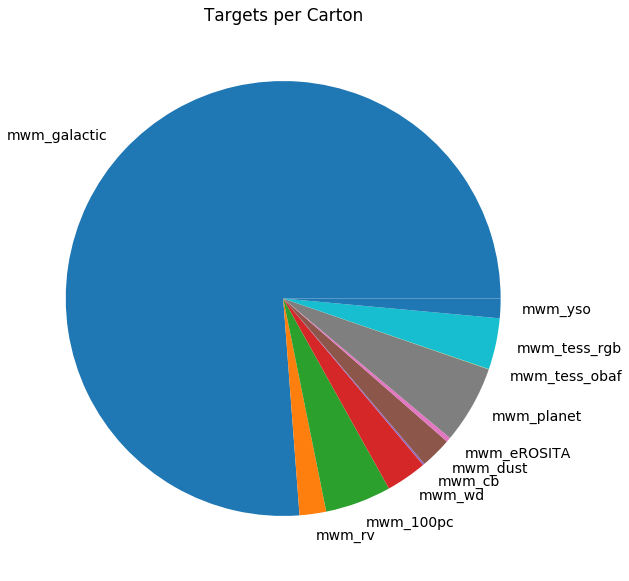

In [15]:
uber_ntotal_arr = np.array(uber_ntotal_list)
uber_qtotal_arr = np.array(uber_qtotal_list)
ntotal = np.sum(uber_ntotal_arr)
qtotal = np.sum(uber_qtotal_arr)


exptime = 15 #15 Minute Quanta
    
print("Total Target Number for MWM: {}".format(ntotal))
print("Total Quanta for MWM: {}".format(qtotal))
print("Total Fiber-Hours for MWM: {}".format(qtotal*exptime/60.0))
print()   
for i in range(len(uber_ntotal_arr)):
    print("{} : {} Targets, {} quanta, {} Fiber-hours, {:.1%} Percent total ".format(
                                                                        uber_cadence_list[i],uber_ntotal_arr[i], 
                                                                        uber_qtotal_arr[i],
                                                                        uber_qtotal_arr[i]*exptime/60.0,
                                                                        uber_qtotal_arr[i]/qtotal))
plt.figure(figsize=(10,10))
plt.pie(uber_ntotal_arr,labels=uber_cadence_list)
plt.title("Targets per Carton")
plt.show()

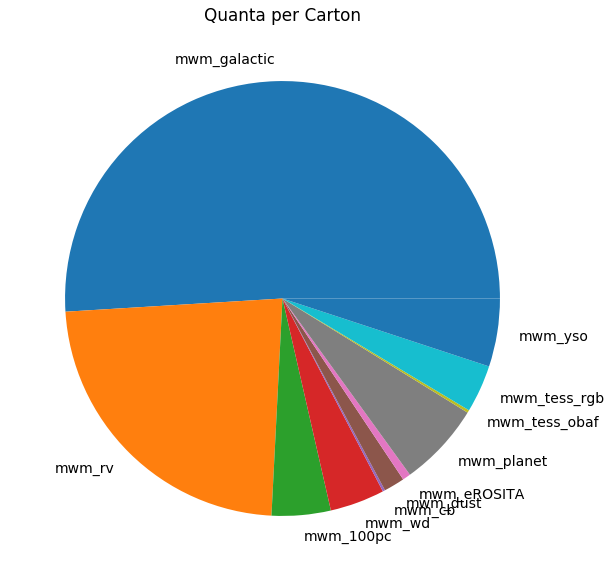

In [16]:
plt.figure(figsize=(10,10))
plt.pie(uber_qtotal_arr,labels=uber_cadence_list)
plt.title("Quanta per Carton")
plt.show()

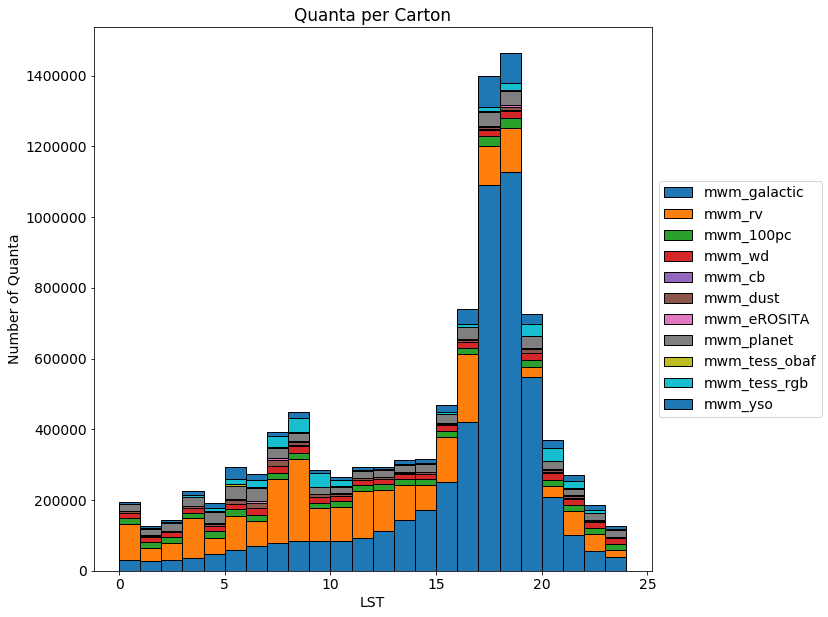

In [17]:
plt.figure(figsize=(10,10))
plt.hist(uber_ra_list,bins=24,range=(0,24),weights=uber_nepoch_list,label=uber_cadence_list,histtype='barstacked',
            edgecolor='black')
plt.xlabel("LST")
plt.ylabel("Number of Quanta")
plt.title("Quanta per Carton")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

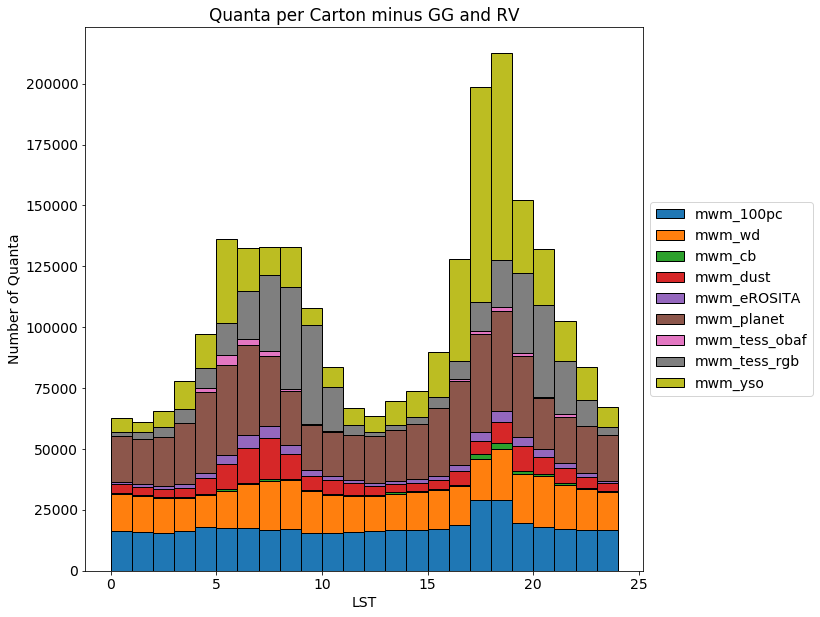

In [18]:
plt.figure(figsize=(10,10))
plt.hist(uber_ra_list[2:],bins=24,range=(0,24),weights=uber_nepoch_list[2:],label=uber_cadence_list[2:]
         ,histtype='barstacked',edgecolor='black')
plt.xlabel("LST")
plt.ylabel("Number of Quanta")
plt.title("Quanta per Carton minus GG and RV")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()